# **Airbnb Madrid**
El objetivo de este trabajo es comprobar si se está utilizando la plataforma Airbnb por parte de empresas, en lugar de particulares, para alquiler turístico en el centro de Madrid.


Datos abiertos de Inside Airbnb: Fichero alojamientos Madrid detallado.

#### Importamos librerias:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

## Sin usar Pandas:

#### Actividad 1: 
Extraer del fichero de alojamientos una lista con todos los alojamientos, donde cada alojamiento sea un diccionario que contenga el identificador del alojamiento, el identificador del anfitrión, el distrito, el precio y las plazas.

In [11]:
try:
    f = open('madridairbnb.csv', encoding='utf-8')
except FileNotFoundError:
    print('El fichero no existe.')
else:
    lineas = f.readlines()
    f.close()
    columnas = lineas[0].split('\t')
    seleccion = ['id', 'host_id', 'neighbourhood_group_cleansed', 'accommodates', 'price']
    traduccion = {'id':'id', 'host_id':'anfitrion', 'neighbourhood_group_cleansed':'distrito', 'accommodates':'plazas', 'price':'precio'}
    alojamientos = []
    for linea in lineas[1:]:
        alojamiento = {}
        campos = linea.split('\t')
        for i in range(len(columnas)):
            if columnas[i] in seleccion:
                alojamiento[traduccion[columnas[i]]] = campos[i]
        alojamientos.append(alojamiento)

    df_alojamientos = pd.DataFrame(alojamientos)
df_alojamientos   


,id,anfitrion,distrito,plazas,precio
0,6369,13660,Chamartín,2,$70.00
1,21853,83531,Latina,1,$17.00
2,24805,101471,Centro,3,$80.00
3,24836,101653,Centro,4,$115.00
4,26825,114340,Arganzuela,1,$25.00
...,...,...,...,...,...
995,2686592,13751801,Centro,1,$21.00
996,2701211,1650712,Salamanca,4,$165.00
997,2704499,13841663,Centro,3,$85.00
998,2706194,1843216,Centro,4,$69.00


#### Actividad 2:
Crear una función que reciba la lista de alojamientos y devuelva el número de alojamientos en cada distrito.

In [12]:
def alojamientos_distritos(df_alojamientos):

    # Utilizamos value_counts para contar los alojamientos en cada distrito.
    alojamiento_distritos = df_alojamientos['distrito'].value_counts().to_dict()

    # Convertimos el diccionario a DataFrame
    df_alojamiento_distritos = pd.DataFrame(list(alojamiento_distritos.items()), columns=['Distrito', 'Número de alojamientos'])

    return df_alojamiento_distritos

# Ejemplo
alojamientos_distritos(df_alojamientos)



,Distrito,Número de alojamientos
0,Centro,618
1,Chamberí,69
2,Salamanca,51
3,Arganzuela,44
4,Retiro,35
5,Ciudad Lineal,23
6,Chamartín,22
7,Tetuán,19
8,Latina,19
9,Moncloa - Aravaca,18


#### Actividad 3:
Crear una función que reciba la lista de alojamientos y un número de ocupantes y devuelva la lista de alojamientos con un número de plazas mayor o igual que el número de ocupantes.

In [13]:
def filtrar_plazas(df_alojamientos, plazas):

    # Asegurándonos de que 'plazas' es un entero
    df_alojamientos['plazas'] = df_alojamientos['plazas'].astype(int)

    # Con query
    return df_alojamientos.query('plazas >= @plazas')

# Ejemplo
filtro = filtrar_plazas(df_alojamientos, 10)
filtro



,id,anfitrion,distrito,plazas,precio
81,256004,1732442,Centro,12,$80.00
89,264054,1370007,Centro,12,$480.00
215,536574,447969,Arganzuela,10,$70.00
295,685152,3494012,Hortaleza,12,$155.00
297,688795,1732442,Centro,10,$75.00
341,745728,3797913,Centro,12,$250.00
371,773861,1732442,Centro,12,$75.00
406,834562,4365768,Barajas,10,$110.00
509,970485,5302455,Retiro,16,$350.00
537,1044902,5751753,Moncloa - Aravaca,16,$85.00


#### Actividad 4:
Crear una función que reciba la lista de alojamientos un distrito, y devuelva los 10 alojamientos más baratos del distrito.

In [14]:
def alojamientos_baratos(df_alojamientos, distrito, n):

    # Asegurándonos de que 'precio' es un número flotante (debemos quitar el símbolo de la moneda si está presente)
    df_alojamientos['precio'] = df_alojamientos['precio'].replace('[\$,]', '', regex=True).astype(float)

    # Filtramos los alojamientos del distrito y los ordenamos por precio
    df_alojamientos_baratos = df_alojamientos[df_alojamientos['distrito'] == distrito].sort_values('precio')

    # Devolvemos los n primeros alojamientos
    return df_alojamientos_baratos.head(n)

# Ejemplo
top_arganzuela = alojamientos_baratos(df_alojamientos, 'Arganzuela', 10)
top_arganzuela


,id,anfitrion,distrito,plazas,precio
829,1890985,5675916,Arganzuela,2,18.0
474,896291,4778528,Arganzuela,2,19.0
216,537234,2638528,Arganzuela,1,22.0
299,691344,655088,Arganzuela,1,23.0
136,375472,1888816,Arganzuela,2,24.0
451,883037,4674072,Arganzuela,1,24.0
344,748854,1888816,Arganzuela,1,24.0
4,26825,114340,Arganzuela,1,25.0
715,1592439,4043145,Arganzuela,1,25.0
257,605697,2999728,Arganzuela,2,25.0


#### Actividad 5:
Crear una función que reciba la lista de alojamientos y devuelva un diccionario con los anfitriones y el número de alojamientos que posee cada uno.

In [15]:
def alojamientos_anfitriones(df_alojamientos):

    # Utilizamos value_counts para contar los alojamientos de cada anfitrión
    alojamiento_anfitriones = df_alojamientos['anfitrion'].value_counts().to_frame()

    return alojamiento_anfitriones

# Ejemplo
anfitriones = alojamientos_anfitriones(df_alojamientos)
anfitriones


,anfitrion
1408525,15
534128,12
5542111,12
596469,8
4735460,7
...,...
4012290,1
4032439,1
4036376,1
4053105,1


## Usando Pandas:



#### Actividad 6:
Preprocesar el fichero de alojamientos para crear un data frame con las variables id, host_id, listing_url, room_type, neighbourhood_group_cleansed, price, cleaning_fee, accommodates, minimum_nights, minimum_cost, review_scores_rating, latitude, longitude, is_location_exact. Eliminar del data frame cualquier fila incompleta. Añadir al data frame nuevas variables con el coste mínimo por noche y por persona (que incluya los gastos de limpieza).

In [16]:
df_alojamientos


,id,anfitrion,distrito,plazas,precio
0,6369,13660,Chamartín,2,70.0
1,21853,83531,Latina,1,17.0
2,24805,101471,Centro,3,80.0
3,24836,101653,Centro,4,115.0
4,26825,114340,Arganzuela,1,25.0
...,...,...,...,...,...
995,2686592,13751801,Centro,1,21.0
996,2701211,1650712,Salamanca,4,165.0
997,2704499,13841663,Centro,3,85.0
998,2706194,1843216,Centro,4,69.0


In [17]:
import pandas as pd


alojamientos = pd.read_csv('madridairbnb.csv', sep='\t')


column_names = {
    'host_id': 'anfitrion',
    'listing_url': 'url',
    'room_type': 'tipo_alojamiento',
    'neighbourhood_group_cleansed': 'distrito',
    'price': 'precio',
    'cleaning_fee': 'gastos_limpieza',
    'accommodates': 'plazas',
    'minimum_nights': 'noches_minimas',
    'review_scores_rating': 'puntuacion'
}
alojamientos.rename(columns=column_names, inplace=True)


selected_columns = ['id', 'anfitrion', 'url', 'tipo_alojamiento', 'distrito', 'precio', 'gastos_limpieza', 'plazas', 'noches_minimas', 'puntuacion']
alojamientos = alojamientos[selected_columns]


alojamientos = alojamientos.dropna()


alojamientos['precio'] = alojamientos['precio'].str.replace(',', '').str[1:].astype(float)
alojamientos['gastos_limpieza'] = alojamientos['gastos_limpieza'].str[1:].astype(float)

alojamientos['precio_persona'] = (alojamientos['precio'] * alojamientos['noches_minimas'] + alojamientos['gastos_limpieza']) / (alojamientos['noches_minimas'] + alojamientos['plazas'])


print(alojamientos)



AttributeError: module 'numpy' has no attribute 'matrix'

#### Actividad 7:
Crear una función que reciba una lista de distritos y devuelva un diccionario con los tipos de alojamiento en ese distrito y el porcentaje de alojamientos de ese tipo.

In [ ]:
def obtener_porcentaje_tipos_alojamiento(distritos):
    alojamientos_distritos = alojamientos[alojamientos['distrito'].isin(distritos)]

    conteo_tipos_alojamiento = alojamientos_distritos['tipo_alojamiento'].value_counts()

    porcentaje_tipos_alojamiento = (conteo_tipos_alojamiento / alojamientos_distritos.shape[0]) * 100

    diccionario_tipos_alojamiento = porcentaje_tipos_alojamiento.to_dict()

    return diccionario_tipos_alojamiento

distritos = ['Chamartín', 'Arganzuela', 'Centro']
resultado = obtener_porcentaje_tipos_alojamiento(distritos)
print(resultado)


{'Entire home/apt': 80.03472222222221, 'Private room': 17.881944444444446, 'Hotel room': 1.3888888888888888, 'Shared room': 0.6944444444444444}


#### Actividad 8:
Crear una función que reciba una lista de distritos y devuelva un diccionario con el número de alojamientos que cada anfitrión ofrece en esos distrito, ordenado de más a menos alojamientos.

In [ ]:
def obtener_numero_alojamientos_por_anfitrion(distritos):
    alojamientos_distritos = alojamientos[alojamientos['distrito'].isin(distritos)]

    if alojamientos_distritos.empty:
        print("No se encontraron alojamientos en los distritos especificados.")
        return {}

    conteo_alojamientos_anfitrion = alojamientos_distritos['anfitrion'].value_counts()

    diccionario_numero_alojamientos = conteo_alojamientos_anfitrion.to_dict()

    diccionario_numero_alojamientos = dict(sorted(diccionario_numero_alojamientos.items(), key=lambda x: x[1], reverse=True))

    return diccionario_numero_alojamientos

obtener_numero_alojamientos_por_anfitrion(distritos)



{1408525: 14,
 5542111: 12,
 901218: 6,
 596469: 6,
 153391: 6,
 4839888: 6,
 2864064: 5,
 1732442: 5,
 2564339: 5,
 4599639: 5,
 3726732: 5,
 1095831: 4,
 2044655: 4,
 4068912: 4,
 4083688: 4,
 378073: 4,
 353738: 4,
 2991925: 4,
 10651006: 4,
 10940437: 4,
 845399: 4,
 3797913: 4,
 8705535: 4,
 12028707: 3,
 534128: 3,
 4190343: 3,
 2184051: 3,
 4975799: 3,
 2561320: 3,
 4361819: 3,
 1091014: 3,
 4211443: 3,
 4292037: 3,
 8647044: 3,
 3606346: 3,
 3048290: 3,
 4023064: 3,
 814490: 3,
 6072314: 3,
 927343: 3,
 605612: 3,
 877571: 3,
 6566447: 3,
 5795235: 3,
 364585: 2,
 850654: 2,
 852616: 2,
 7218465: 2,
 1470394: 2,
 2444553: 2,
 7033920: 2,
 7823688: 2,
 1331093: 2,
 4582755: 2,
 2541550: 2,
 2376101: 2,
 5500409: 2,
 13569734: 2,
 4305310: 2,
 762655: 2,
 499977: 2,
 606925: 2,
 1888816: 2,
 2847013: 2,
 8789737: 2,
 3983613: 2,
 4231218: 2,
 1496188: 2,
 1130651: 2,
 1522694: 2,
 4304796: 2,
 1714750: 2,
 1650712: 2,
 3898452: 2,
 805726: 2,
 2785251: 2,
 1713524: 2,
 2960080: 2

#### Actividad 9:
Crear una función que reciba devuelva un diccionario con el número medio de alojamientos por anfitrión de cada distrito.

In [ ]:
def obtener_numero_medio_alojamientos_por_anfitrion():
    conteo_alojamientos_anfitrion = alojamientos['anfitrion'].value_counts()
    conteo_distritos_anfitrion = alojamientos.groupby('anfitrion')['distrito'].nunique()

    numero_medio_alojamientos_por_anfitrion = conteo_alojamientos_anfitrion / conteo_distritos_anfitrion

    diccionario_numero_medio_alojamientos = numero_medio_alojamientos_por_anfitrion.to_dict()

    return diccionario_numero_medio_alojamientos


#### Actividad 10:
Crear una función que reciba una lista de distritos y dibuje un diagrama de sectores con los porcentajes de tipos de alojamientos en esos distritos.

In [ ]:
def dibujar_diagrama_sectores(distritos):
    alojamientos_filtrados = alojamientos[alojamientos['distrito'].isin(distritos)]
    conteo_tipos_alojamiento = alojamientos_filtrados['tipo_alojamiento'].value_counts()
    porcentajes = (conteo_tipos_alojamiento / conteo_tipos_alojamiento.sum()) * 100

    plt.figure(figsize=(8, 6))
    plt.pie(porcentajes, labels=porcentajes.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Porcentaje de Tipos de Alojamiento por Distrito')
    plt.legend(loc='best')
    plt.show()



#### Actividad 11:
Crear una función que dibuje un diagrama de barras con el número de alojamientos por distritos.


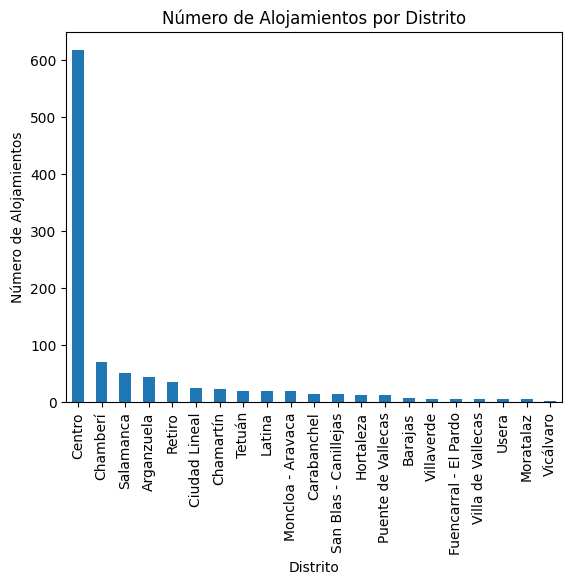

In [ ]:
# Calcular el número de alojamientos por distrito
alojamientos_por_distrito = df_alojamientos['distrito'].value_counts()
    
# Crear el diagrama de barras
alojamientos_por_distrito.plot(kind='bar')
plt.xlabel('Distrito')
plt.ylabel('Número de Alojamientos')
plt.title('Número de Alojamientos por Distrito')
plt.show()


#### Actividad 12.
Crear una función que dibuje un diagrama de barras con los porcentajes acumulados de tipos de alojamientos por distritos.

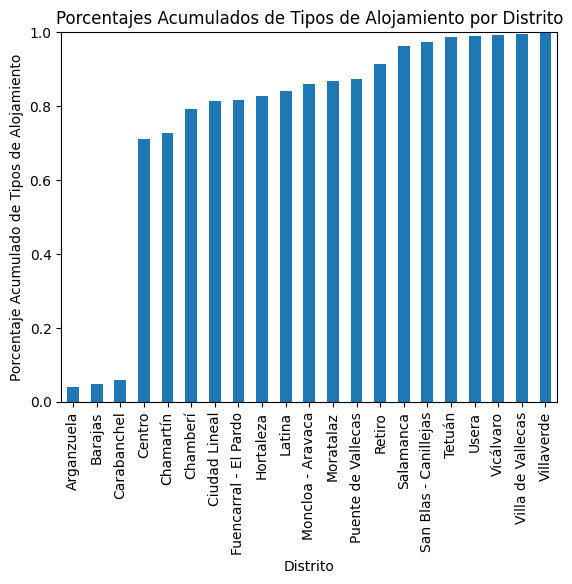

In [ ]:
# Calcular los porcentajes acumulados de tipos de alojamientos por distrito
porcentajes_acumulados = df_alojamientos.groupby(['distrito'])['plazas'].apply(lambda x: x.sum() / df_alojamientos['plazas'].sum()).cumsum()

# Crear el diagrama de barras
porcentajes_acumulados.plot(kind='bar')
plt.xlabel('Distrito')
plt.ylabel('Porcentaje Acumulado de Tipos de Alojamiento')
plt.title('Porcentajes Acumulados de Tipos de Alojamiento por Distrito')
plt.ylim([0, 1])
plt.show()

#### Actividad 13:
Crear una función reciba una lista de distritos y una lista de tipos de alojamientos, y dibuje un diagrama de sectores con la distribución del número de alojamientos de ese tipo por anfitrión.


In [ ]:
def dibujar_diagrama_sectores(distritos, tipos_alojamientos):
    # Filtrar los alojamientos por distritos y tipos de alojamientos seleccionados
    df_filtrado = df_alojamientos[df_alojamientos['distrito'].isin(distritos) & df_alojamientos['plazas'].isin(tipos_alojamientos)]
    
    # Calcular la distribución del número de alojamientos por anfitrión
    distribucion_por_anfitrion = df_filtrado['anfitrion'].value_counts()
    
    # Crear el diagrama de sectores
    distribucion_por_anfitrion.plot(kind='pie', autopct='%1.1f%%')
    plt.axis('equal')  # Aspecto circular
    plt.title('Distribución del número de alojamientos por anfitrión')
    plt.show()

#### Actividad 14:
Crear una función que dibuje un diagrama de barras con los precios medios por persona y día de cada distrito.

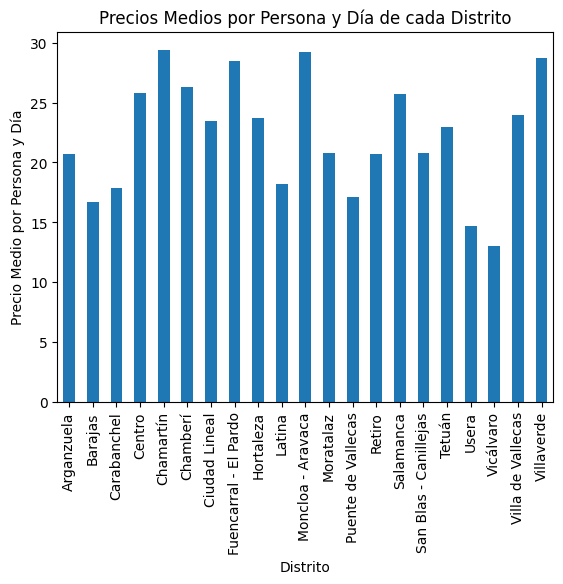

In [ ]:
# Calcular los precios medios por persona y día de cada distrito
df_alojamientos['precio_medio'] = df_alojamientos['precio'] / df_alojamientos['plazas']
precios_medios_distrito = df_alojamientos.groupby('distrito')['precio_medio'].mean()
  
# Crear el diagrama de barras
precios_medios_distrito.plot(kind='bar')
plt.xlabel('Distrito')
plt.ylabel('Precio Medio por Persona y Día')
plt.title('Precios Medios por Persona y Día de cada Distrito')
plt.show()

#### Actividad 15:
Crear una función que reciba una lista de distritos y dibuje un gráfico de dispersión con el coste mínimo por noche y persona y la puntuación en esos distritos.

In [ ]:

def dibujar_grafico_dispercion(distritos):
    # Filtrar los alojamientos por los distritos seleccionados
    df_filtrado = df_alojamientos[df_alojamientos['distrito'].isin(distritos)]
    
    # Crear el gráfico de dispersión
    plt.scatter(df_filtrado['precio'] / df_filtrado['plazas'], df_filtrado['puntuacion'])
    plt.xlabel('Coste mínimo por noche y persona')
    plt.ylabel('Puntuación')
    plt.title('Coste mínimo por noche y persona vs Puntuación')
    plt.show()

#### Actividad 16:
Crear una función que reciba una lista de distritos y dibuje dos histogramas con la distribución de precios por persona y día, uno para los alojamientos con título en inglés y otro para los alojamientos con títulos en español. Si la distribución es muy asimétrica, aplicar una transformación logarítmica. ¿Hay diferencias entre los precios de los alojamientos en inglés y el español? Nota: Para identificar el idioma puede usare el módulo langdetect.


In [19]:
from langdetect import detect
import matplotlib.pyplot as plt
import numpy as np

def histograma_precios_por_idioma(distritos):
    # Filtrar los alojamientos por los distritos seleccionados
    df_filtrado = df_alojamientos[df_alojamientos['distrito'].isin(distritos)]
    
    # Dividir los alojamientos en dos grupos según el idioma del título
    df_ingles = df_filtrado[df_filtrado['titulo'].apply(lambda x: detect(x) == 'en')]
    df_espanol = df_filtrado[df_filtrado['titulo'].apply(lambda x: detect(x) == 'es')]
    
    # Calcular los precios por persona y día
    df_ingles['precio_persona_dia'] = df_ingles['precio'] / df_ingles['plazas']
    df_espanol['precio_persona_dia'] = df_espanol['precio'] / df_espanol['plazas']
    
    # Aplicar una transformación logarítmica si la distribución es muy asimétrica
    if df_ingles['precio_persona_dia'].skew() > 1:
        df_ingles['precio_persona_dia'] = np.log1p(df_ingles['precio_persona_dia'])
    if df_espanol['precio_persona_dia'].skew() > 1:
        df_espanol['precio_persona_dia'] = np.log1p(df_espanol['precio_persona_dia'])
    
    # Dibujar los histogramas
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(df_ingles['precio_persona_dia'], bins=30, alpha=0.5, color='blue')
    plt.title('Distribución de precios por persona y día (inglés)')
    plt.xlabel('Precio por persona y día')
    plt.ylabel('Frecuencia')
    
    plt.subplot(1, 2, 2)
    plt.hist(df_espanol['precio_persona_dia'], bins=30, alpha=0.5, color='green')
    plt.title('Distribución de precios por persona y día (español)')
    plt.xlabel('Precio por persona y día')
    plt.ylabel('Frecuencia')
    
    plt.tight_layout()
    plt.show()

